In [1]:
import torch
import torchvision
from torchvision import transforms

# Define transformations to apply to the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Load the train and validation datasets
train_dataset = torchvision.datasets.VOCDetection(root='./data', 
                                                  year='2012', 
                                                  image_set='train', 
                                                  transform=transform, 
                                                  download=True)
val_dataset = torchvision.datasets.VOCDetection(root='./data', 
                                                year='2012', 
                                                image_set='val', 
                                                transform=transform, 
                                                download=True)

def collate_fn(batch):
    return zip(*batch)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn)

Using downloaded and verified file: ./data/VOCtrainval_11-May-2012.tar
Extracting ./data/VOCtrainval_11-May-2012.tar to ./data
Using downloaded and verified file: ./data/VOCtrainval_11-May-2012.tar
Extracting ./data/VOCtrainval_11-May-2012.tar to ./data


In [18]:
images, labels = next(iter(train_loader))

In [21]:
print(type(images))
print(labels[0]['annotation']['object'])

<class 'tuple'>
[{'name': 'bicycle', 'bndbox': {'xmax': '480', 'xmin': '60', 'ymax': '333', 'ymin': '37'}, 'difficult': '0', 'occluded': '0', 'pose': 'Unspecified', 'truncated': '1'}, {'name': 'person', 'bndbox': {'xmax': '255', 'xmin': '140', 'ymax': '146', 'ymin': '1'}, 'difficult': '0', 'occluded': '1', 'pose': 'Unspecified', 'truncated': '1'}]


TypeError: tensor or list of tensors expected, got <class 'tuple'>

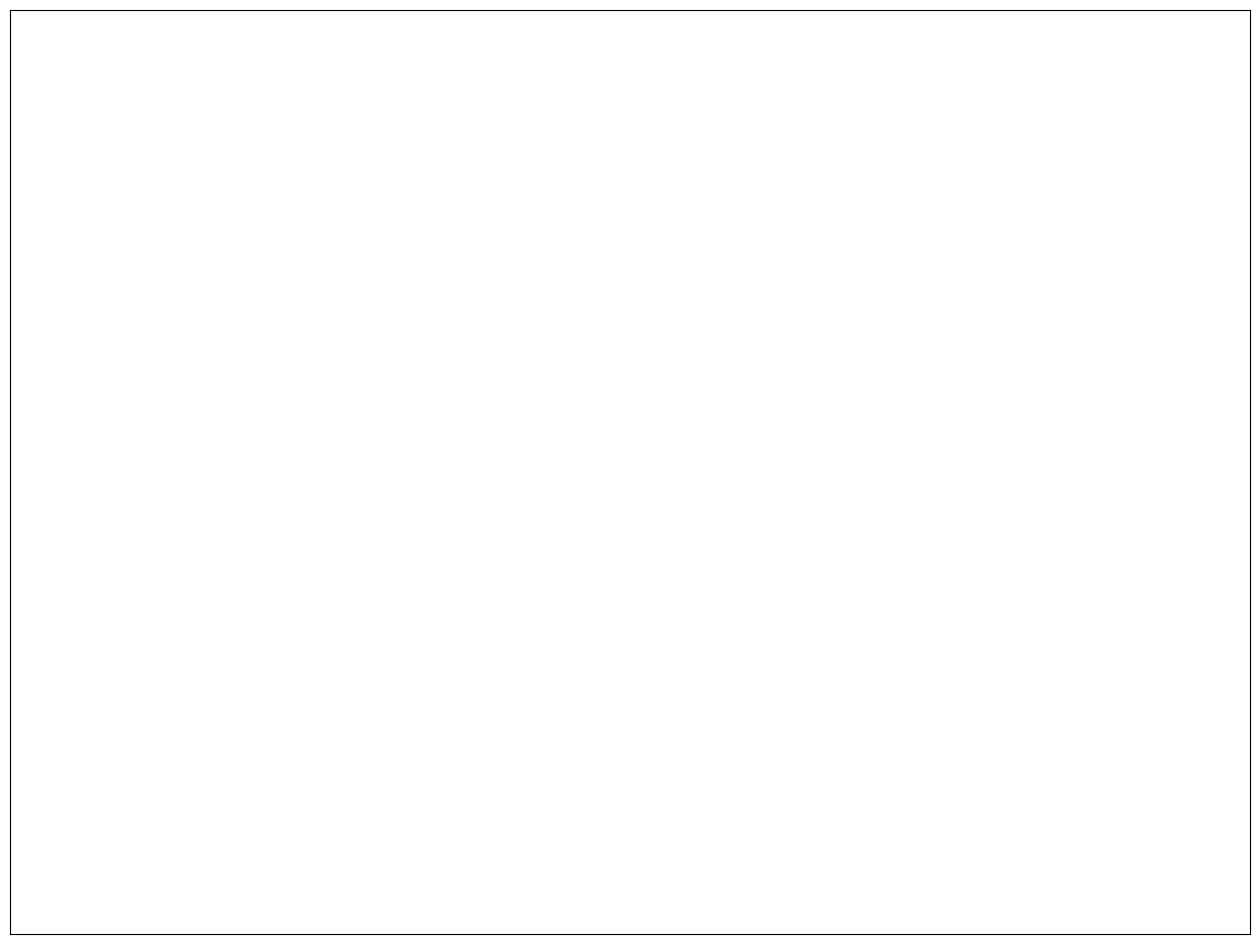

In [20]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def show_batch(dl):
    for images, _ in dl:
        fig,ax = plt.subplots(figsize=(16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
        break

show_batch(train_loader)